# <div align="center" style="color:red;">Code Project Machine Learning</div>
### <div align="center"> GROUP 1 : LOGISTIC REGRESSION</div>
#### <div align="center"> Even Semester 2023/2024 </div>
---

<font color='red'><h2>Importing Library</h2></font>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from sklearn.ensemble import RandomForestClassifier

<font color='red'><h2>Read Dataset</h2></font>

In [2]:
fraud_data = pd.read_csv('onlinefraud.csv')
fraud_data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


## Deskripsi Dataset Per Kolom

- **step**: Mewakili satuan waktu di mana 1 langkah setara dengan 1 jam.
- **type**: Jenis transaksi online.
- **amount**: Jumlah transaksi.
- **nameOrig**: Pelanggan yang memulai transaksi.
- **oldbalanceOrg**: Saldo sebelum transaksi untuk pelanggan yang memulai transaksi.
- **newbalanceOrig**: Saldo setelah transaksi untuk pelanggan yang memulai transaksi.
- **nameDest**: Penerima transaksi.
- **oldbalanceDest**: Saldo awal penerima sebelum transaksi.
- **newbalanceDest**: Saldo baru penerima setelah transaksi.
- **isFraud**: Menunjukkan apakah transaksi tersebut merupakan penipuan.

# <font color='red'><h1>Exploratory Data Analysis</h1></font>

Getting information about the dataset

In [3]:
fraud_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


Descriptive statistics of the dataset

In [4]:
fraud_data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [5]:
print(fraud_data)

         step      type      amount     nameOrig  oldbalanceOrg  \
0           1   PAYMENT     9839.64  C1231006815      170136.00   
1           1   PAYMENT     1864.28  C1666544295       21249.00   
2           1  TRANSFER      181.00  C1305486145         181.00   
3           1  CASH_OUT      181.00   C840083671         181.00   
4           1   PAYMENT    11668.14  C2048537720       41554.00   
...       ...       ...         ...          ...            ...   
6362615   743  CASH_OUT   339682.13   C786484425      339682.13   
6362616   743  TRANSFER  6311409.28  C1529008245     6311409.28   
6362617   743  CASH_OUT  6311409.28  C1162922333     6311409.28   
6362618   743  TRANSFER   850002.52  C1685995037      850002.52   
6362619   743  CASH_OUT   850002.52  C1280323807      850002.52   

         newbalanceOrig     nameDest  oldbalanceDest  newbalanceDest  isFraud  \
0             160296.36  M1979787155            0.00            0.00        0   
1              19384.72  M2044282

In [6]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
fraud_data['type_encoded'] = label_encoder.fit_transform(fraud_data['type'])
target_correlation = fraud_data['type_encoded'].corr(fraud_data['isFraud'])
print(target_correlation)

0.020833385439948397


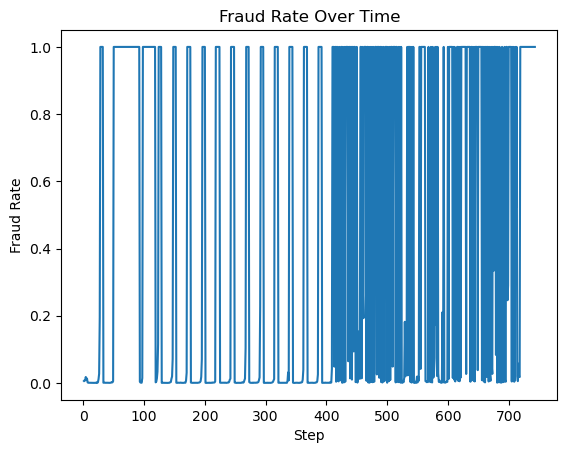

In [7]:
transaction_time_analysis = fraud_data.groupby('step')['isFraud'].mean()
plt.plot(transaction_time_analysis)
plt.xlabel('Step')
plt.ylabel('Fraud Rate')
plt.title('Fraud Rate Over Time')
plt.show()

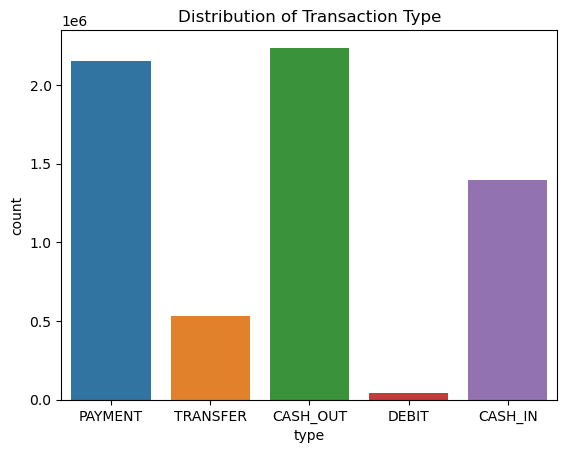

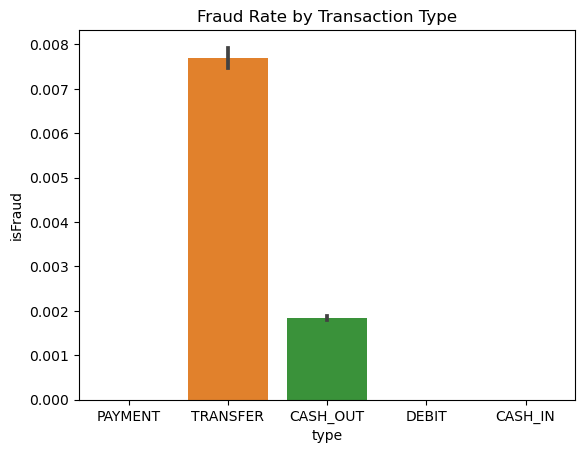

In [8]:
categorical_feature = 'type'
sns.countplot(x=categorical_feature, data=fraud_data)
plt.title('Distribution of Transaction Type')
plt.show()
sns.barplot(x=categorical_feature, y='isFraud', data=fraud_data)
plt.title('Fraud Rate by Transaction Type')
plt.show()

### Distrbusi kartu

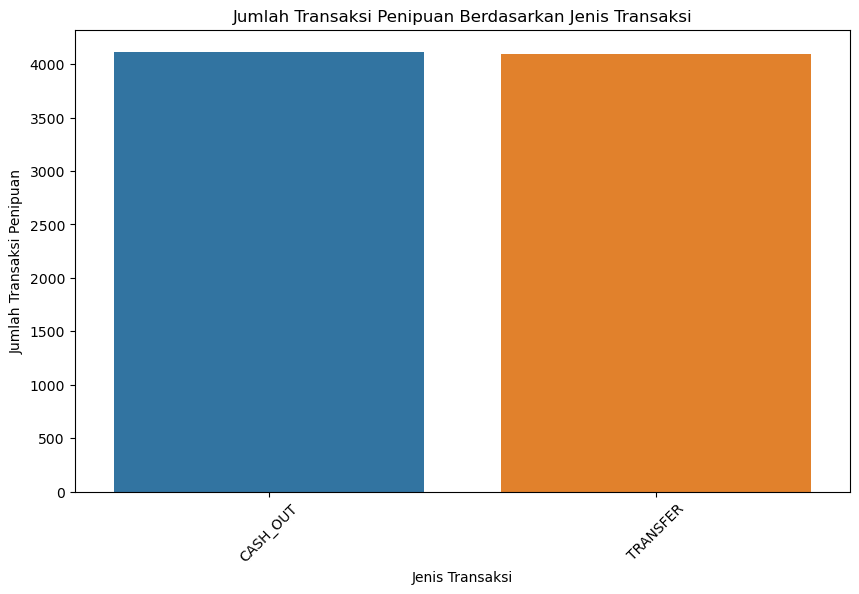

In [9]:
fraud_transactions = fraud_data[fraud_data['isFraud'] == 1]
fraud_count_by_type = fraud_transactions['type'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=fraud_count_by_type.index, y=fraud_count_by_type.values)
plt.title('Jumlah Transaksi Penipuan Berdasarkan Jenis Transaksi')
plt.xlabel('Jenis Transaksi')
plt.ylabel('Jumlah Transaksi Penipuan')
plt.xticks(rotation=45)
plt.show()

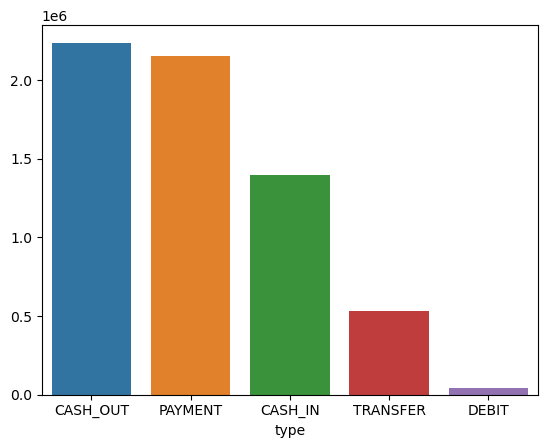

In [10]:
sns.barplot(x = fraud_data.type.value_counts().index, y = fraud_data.type.value_counts().values)
plt.show()

### Total Jumlah Transaksi Pelanggan (nameOrig)

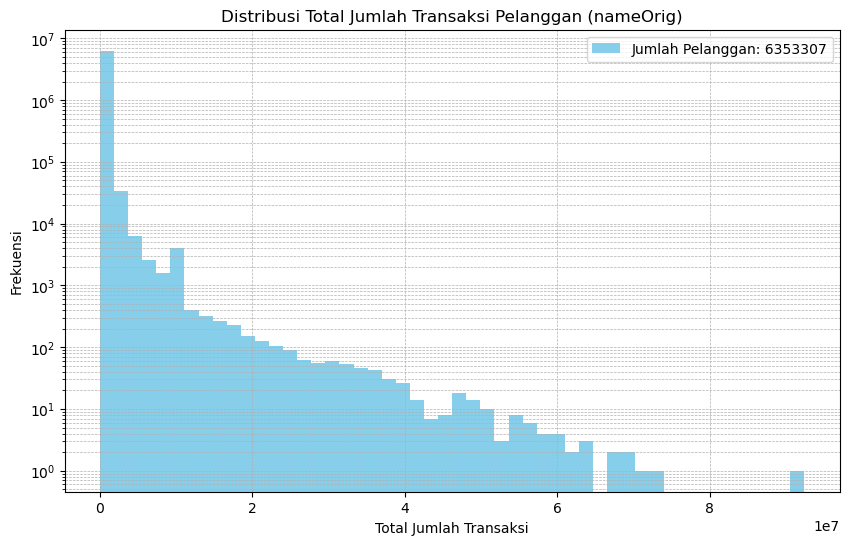

In [11]:
pelanggan_total = fraud_data.groupby('nameOrig')['amount'].sum()
plt.figure(figsize=(10, 6))
plt.hist(pelanggan_total, bins=50, log=True, color='skyblue')
plt.title('Distribusi Total Jumlah Transaksi Pelanggan (nameOrig)')
plt.xlabel('Total Jumlah Transaksi')
plt.ylabel('Frekuensi')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend([f'Jumlah Pelanggan: {len(pelanggan_total)}'])
plt.show()

### Total Jumlah Transaksi Penerima (nameDest)

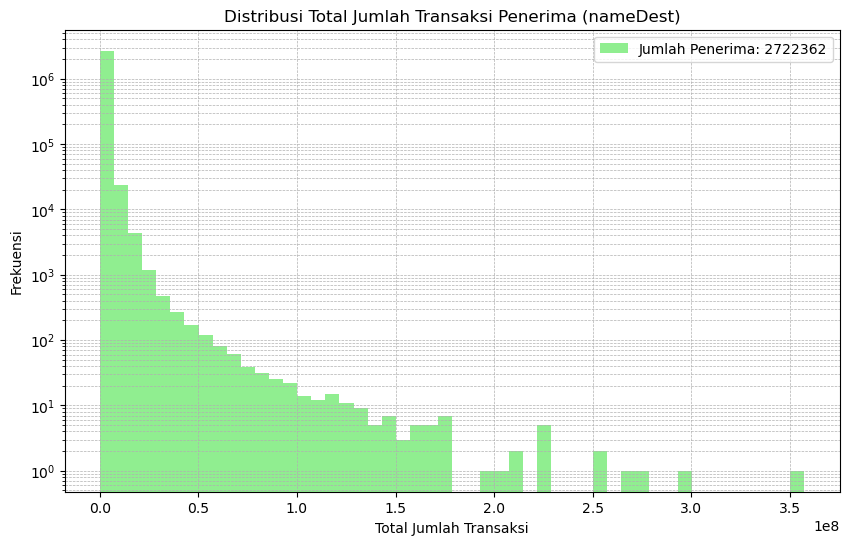

In [12]:
penerima_total = fraud_data.groupby('nameDest')['amount'].sum()
plt.figure(figsize=(10, 6))
plt.hist(penerima_total, bins=50, log=True, color='lightgreen')
plt.title('Distribusi Total Jumlah Transaksi Penerima (nameDest)')
plt.xlabel('Total Jumlah Transaksi')
plt.ylabel('Frekuensi')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend([f'Jumlah Penerima: {len(penerima_total)}'])
plt.show()

### Boxplot perbandingan saldo sebelum dan sesudah transaksi

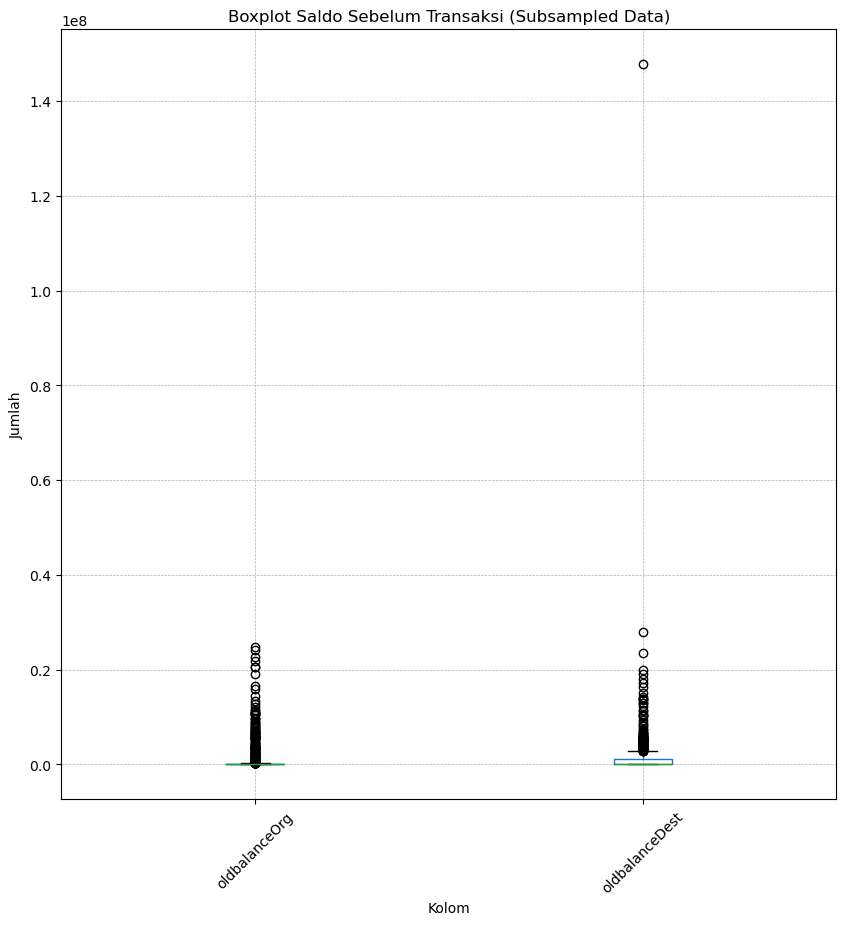

In [13]:
sampled_data = fraud_data.sample(n=1000) 

columns_to_plot = ['oldbalanceOrg', 'oldbalanceDest']
plt.figure(figsize=(10, 10))
sampled_data[columns_to_plot].boxplot()
plt.title('Boxplot Saldo Sebelum Transaksi (Subsampled Data)')
plt.xlabel('Kolom')
plt.ylabel('Jumlah')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', linewidth=0.5)
plt.show()

Visualizing the distribution of 'newbalanceDest' using a boxplot

## Visualizing the relationship between 'oldbalanceOrg' and 'newbalanceDest' using a scatter plot

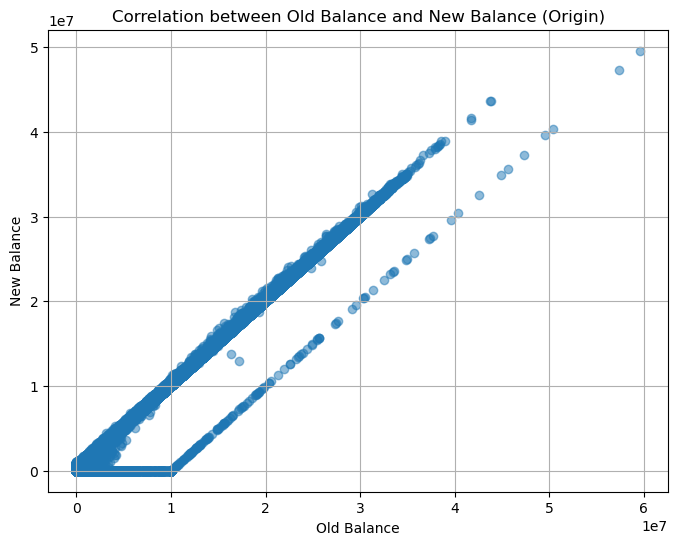

In [14]:
plt.figure(figsize=(8, 6))
plt.scatter(fraud_data['oldbalanceOrg'], fraud_data['newbalanceOrig'], alpha=0.5)
plt.title('Correlation between Old Balance and New Balance (Origin)')
plt.xlabel('Old Balance')
plt.ylabel('New Balance')
plt.grid(True)
plt.show()

## Visualization of Correlation Variable 

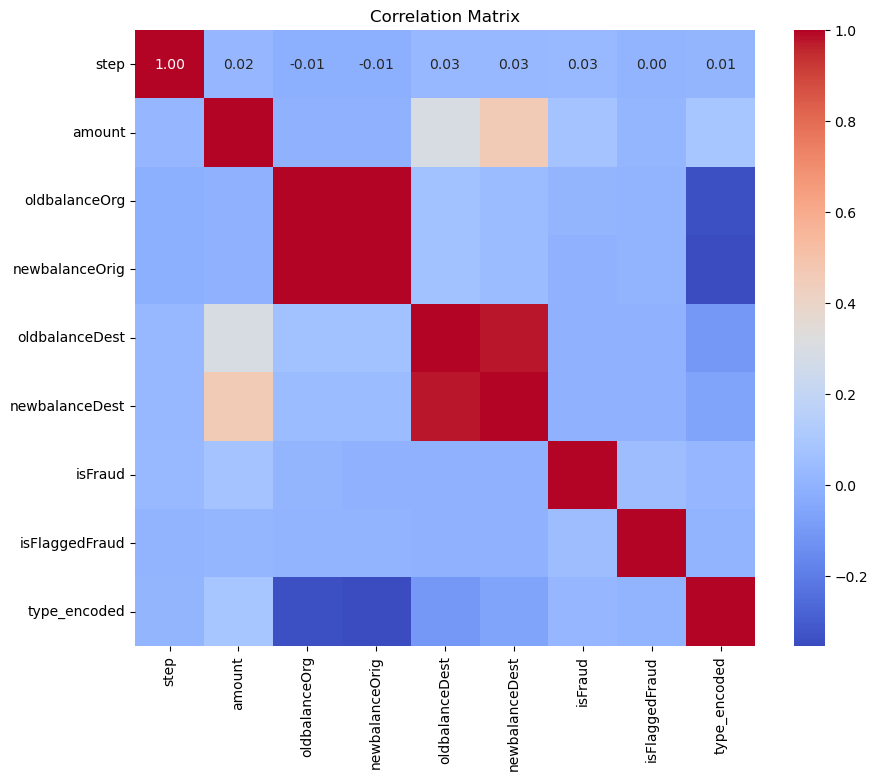

In [15]:
correlation_matrix = fraud_data.corr(numeric_only=True)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

# <font color='red'><h1>Data Cleaning</h1></font>

### Check for Missing Value

In [16]:
fraud_data.isna().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
type_encoded      0
dtype: int64

### Check Nilai Duplicate data 

In [17]:
fraud_data.duplicated().sum()

0

### Data Cleaning Use the Interquartile Range (IQR) for Outliers

#### Show Boxplot for check Outlier

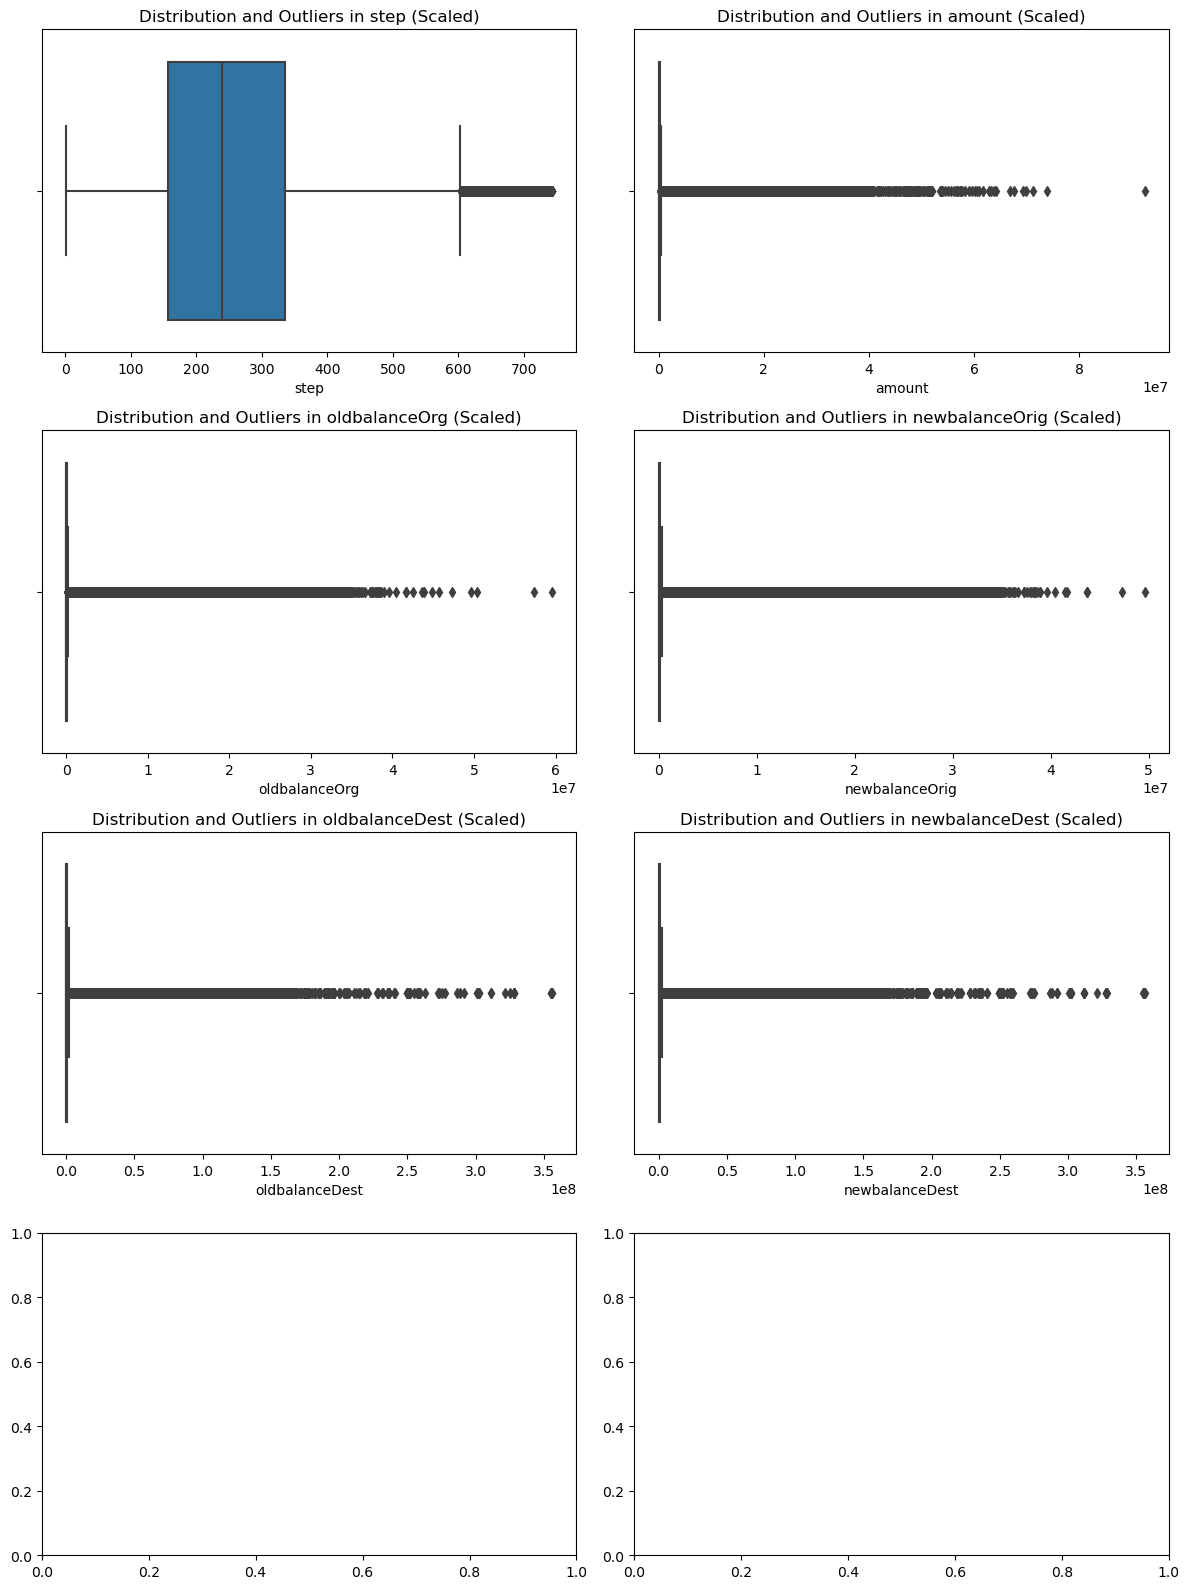

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

def visualize_distributions_and_outliers(df, columns):
    fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(12, 16))
    axes = axes.flatten()  # Flatten the 2D array of axes into a 1D array

    for i, column in enumerate(columns):
        sns.boxplot(x=df[column], orient='h', ax=axes[i])
        axes[i].set_title(f"Distribution and Outliers in {column} (Scaled)")
        axes[i].set_xlabel(f"{column}")

    # Adjust layout
    plt.tight_layout()
    plt.show()

columns_to_visualize = ['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']

visualize_distributions_and_outliers(fraud_data, columns_to_visualize)


### Melakukan cek Jumlah Outlier sekaligus Menghapusnya

In [19]:
import pandas as pd

def remove_outliers_iqr(df, columns, threshold=555):  
    cleaned_data = df.copy() 
    outliers = pd.DataFrame()  

    for col in columns:
        if cleaned_data[col].dtype != 'object': 
            Q1 = cleaned_data[col].quantile(0.25)
            Q3 = cleaned_data[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - threshold * IQR
            upper_bound = Q3 + threshold * IQR
            outliers_col = cleaned_data[(cleaned_data[col] < lower_bound) | (cleaned_data[col] > upper_bound)]
            outliers = pd.concat([outliers, outliers_col])
            cleaned_data = cleaned_data[~((cleaned_data[col] < lower_bound) | (cleaned_data[col] > upper_bound))]
    
    return cleaned_data, outliers

# Define columns to clean
all_columns_to_clean = ['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']

# Call the function with defined columns
cleaned_data_iqr, outliers_iqr = remove_outliers_iqr(fraud_data, all_columns_to_clean)


### Lalu print jumlah outlier di setiap kolom lagi untuk melihat apakah ada perubahan

In [20]:
for col in all_columns_to_clean:
    if cleaned_data_iqr[col].dtype != 'object':
        print(f"Number of outliers in {col}: {outliers_iqr[col].shape[0]}")
    else:
        print(f"Skipping {col} as it is not numeric.")


Number of outliers in step: 0
Number of outliers in amount: 0
Number of outliers in oldbalanceOrg: 0
Number of outliers in newbalanceOrig: 0
Number of outliers in oldbalanceDest: 0
Number of outliers in newbalanceDest: 0


In [21]:
data_fraud = cleaned_data_iqr

# <font color='red'><h1>Data Preprocessing</h1></font>

### Size Mapping for Categorical Column

Mapping categorical values to numerical values for the 'type' column


In [22]:
data_fraud["type"] = data_fraud["type"].map({"CASH_OUT": 1, "PAYMENT": 2, "CASH_IN": 3, "TRANSFER": 4, "DEBIT": 5})

### Visualizing the distribution of fraud and non-fraud transactions using a pie chart.

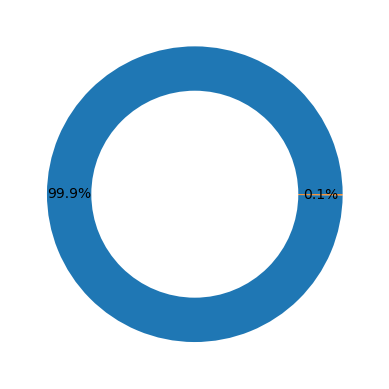

In [23]:
plt.pie(data_fraud.isFraud.value_counts(),
        autopct='%1.1f%%', pctdistance=0.85)
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.show()

## Melakukan random sampling untuk mengatasi ketidakseimbangan data

In [24]:
import pandas as pd

fraudulent_data = data_fraud[data_fraud['isFraud'] == 1]
non_fraudulent_data = data_fraud[data_fraud['isFraud'] == 0]

minority_class_size = len(fraudulent_data)

sampled_non_fraudulent_data = non_fraudulent_data.sample(n=minority_class_size, random_state=42)

balanced_data = pd.concat([sampled_non_fraudulent_data, fraudulent_data])

### Cek data setelah dilakukan random sampling untuk memastikan sudah seimbang

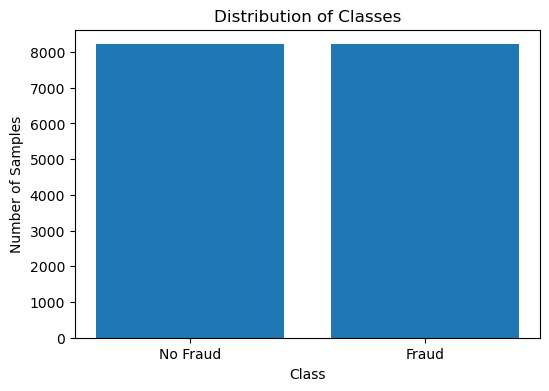

In [25]:
class_counts = balanced_data['isFraud'].value_counts()

# Membuat plot
plt.figure(figsize=(6, 4))
plt.bar(['No Fraud', 'Fraud'], class_counts)
plt.xlabel('Class')
plt.ylabel('Number of Samples')
plt.title('Distribution of Classes')
plt.show()

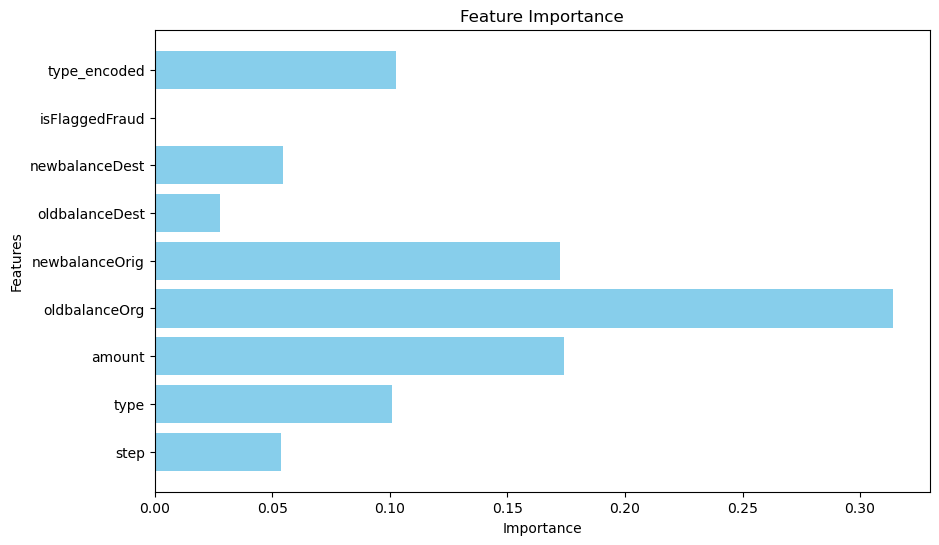

In [26]:
X = balanced_data.drop(['isFraud', 'nameOrig', 'nameDest'], axis=1)
y = balanced_data['isFraud']

rf = RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_split=5, random_state=42)
rf.fit(X, y)
feature_importances = rf.feature_importances_

plt.figure(figsize=(10, 6))
plt.barh(X.columns, feature_importances, color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importance')
plt.show()


# <font color='red'><h1>Modelling</h1></font>

### <font color='green'><h1>A. Modelling Dengan 4 Fitur dari Feature Selection</h1>

## Membuat deklarasi fitur dan target

In [27]:
selected_features = ['type', 'amount', 'oldbalanceOrg', 'newbalanceOrig']
X = balanced_data[selected_features]
y = balanced_data['isFraud']

## Splitting dataset menjadi train dan test

In [28]:
from sklearn.preprocessing import StandardScaler

#normalisasi
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

log_reg = LogisticRegression(max_iter=1000)

In [30]:
# Mendefinisikan grid hyperparameter yang akan di-tune
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

In [31]:
# Mendefinisikan K-Fold cross-validator
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

In [32]:
# Membuat objek GridSearchCV
grid_search = GridSearchCV(estimator=log_reg, param_grid=param_grid, cv=kfold, scoring='accuracy')

# Melatih model dengan hyperparameter tuning menggunakan data latih
grid_search.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=LogisticRegression(max_iter=1000),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100]},
             scoring='accuracy')

In [33]:
# Mendapatkan model terbaik
best_model = grid_search.best_estimator_

In [34]:
# Lakukan prediksi pada data uji menggunakan model terbaik
y_pred = best_model.predict(X_test)

In [35]:
# Cek Parameter yang digunakan
best_params = grid_search.best_params_

# Tampilkan parameter terbaik
print("Best Parameters:", best_params)

Best Parameters: {'C': 100}


## Evaluasi Model 

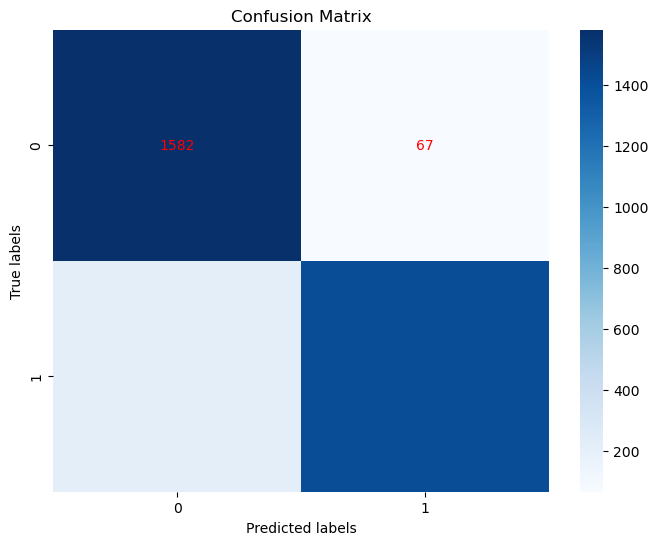

In [36]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Hitung confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix sebagai heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, fmt='d', cmap='Blues', annot=True, annot_kws={"color": "red"})
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


In [37]:
# Evaluasi model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[1582   67]
 [ 223 1414]]

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1649
           1       0.95      0.86      0.91      1637

    accuracy                           0.91      3286
   macro avg       0.92      0.91      0.91      3286
weighted avg       0.92      0.91      0.91      3286



In [38]:
# Mendapatkan akurasi pada data training dan testing
train_accuracy = best_model.score(X_train, y_train)
test_accuracy = best_model.score(X_test, y_test)

# Tampilkan akurasi
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Testing Accuracy: {test_accuracy:.4f}")

Training Accuracy: 0.9095
Testing Accuracy: 0.9117


## Kurva ROC

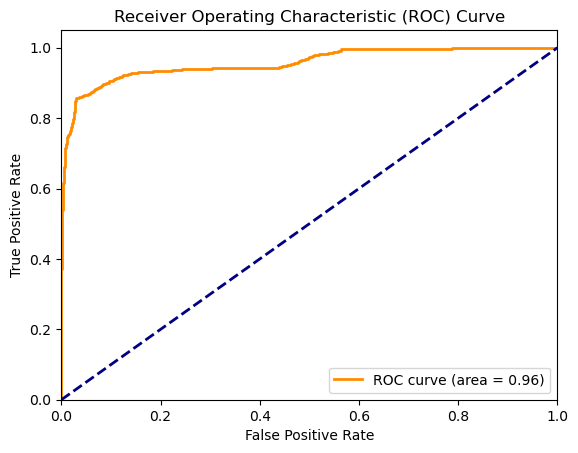

In [39]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Membuat dan melatih model Logistic Regression
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

# Setelah memanggil fit, Anda dapat melakukan prediksi probabilitas
y_scores = log_reg.predict_proba(X_test)[:,1]

# Menghitung nilai TPR dan FPR
y_scores = log_reg.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

# Plot kurva ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

## Uji parameter

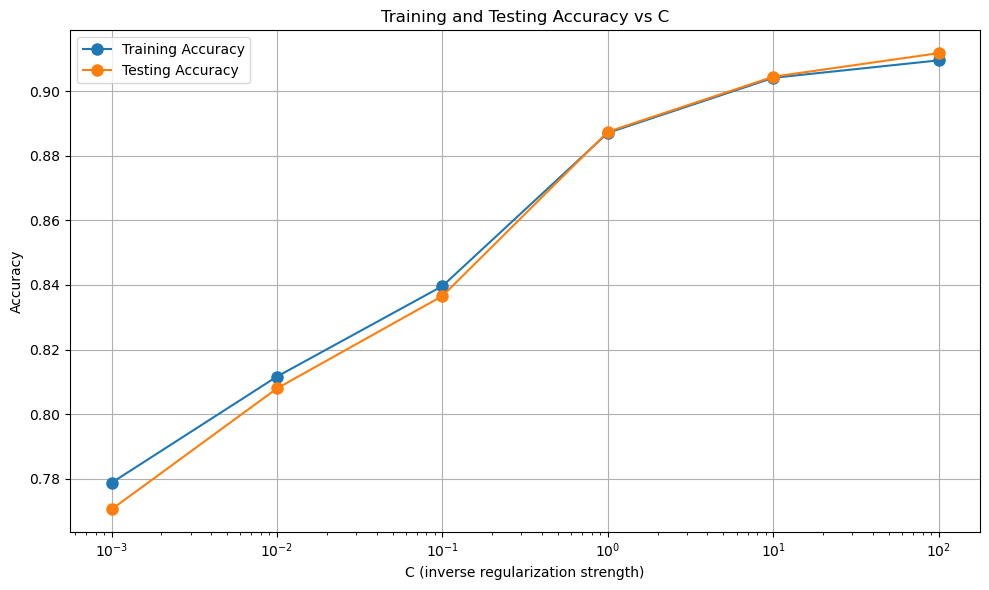

In [40]:
# Mendefinisikan range nilai C yang akan diuji
param_values = [0.001, 0.01, 0.1, 1, 10, 100]

# Menyimpan akurasi pelatihan dan pengujian
train_accuracies = []
test_accuracies = []

# Melakukan grid search untuk setiap nilai C
for c in param_values:
    log_reg = LogisticRegression(C=c, max_iter=1000)
    log_reg.fit(X_train, y_train)
    
    train_accuracy = log_reg.score(X_train, y_train)
    test_accuracy = log_reg.score(X_test, y_test)
    
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

# Plot akurasi pada data training dan testing
plt.figure(figsize=(10, 6))
plt.plot(param_values, train_accuracies, '-o', label='Training Accuracy', markersize=8)
plt.plot(param_values, test_accuracies, '-o', label='Testing Accuracy', markersize=8)
plt.xscale('log')
plt.xlabel('C (inverse regularization strength)')
plt.ylabel('Accuracy')
plt.title('Training and Testing Accuracy vs C')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## Cek Setiap Parameter

In [41]:
# Mendapatkan skor cross-validation
cv_results = grid_search.cv_results_

# Tampilkan skor cross-validation untuk setiap parameter C
for mean_score, params in zip(cv_results['mean_test_score'], cv_results['params']):
    print(f"Mean Accuracy: {mean_score:.4f} with params: {params}")


Mean Accuracy: 0.7754 with params: {'C': 0.001}
Mean Accuracy: 0.8088 with params: {'C': 0.01}
Mean Accuracy: 0.8366 with params: {'C': 0.1}
Mean Accuracy: 0.8863 with params: {'C': 1}
Mean Accuracy: 0.9040 with params: {'C': 10}
Mean Accuracy: 0.9119 with params: {'C': 100}


## Cek Setiap K-Folds (cross validation)

In [42]:
n_splits_values = [3, 5, 7, 10]

results = {}

for n_splits in n_splits_values:
    # Mendefinisikan K-Fold cross-validator
    kfold = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    
    # Membuat objek GridSearchCV
    grid_search = GridSearchCV(estimator=log_reg, param_grid=param_grid, cv=kfold, scoring='accuracy')
    
    # Melatih model dengan hyperparameter tuning menggunakan data latih
    grid_search.fit(X_train, y_train)
    
    # Mendapatkan model terbaik
    best_model = grid_search.best_estimator_
    
    # Lakukan prediksi pada data uji menggunakan model terbaik
    y_pred = best_model.predict(X_test)
    
    # Evaluasi model dengan confusion matrix dan classification report
    conf_matrix = confusion_matrix(y_test, y_pred)
    results[n_splits] = {
        'best_model': best_model,
        'conf_matrix': conf_matrix,
        'accuracy': best_model.score(X_test, y_test)
    }

# Menampilkan hasil evaluasi untuk setiap n_splits
for n_splits, result in results.items():
    print(f"\nEvaluation results for n_splits = {n_splits}:")
    print("Confusion Matrix:")
    print(result['conf_matrix'])
    print("\nTesting Accuracy:", result['accuracy'])
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))


Evaluation results for n_splits = 3:
Confusion Matrix:
[[1582   67]
 [ 223 1414]]

Testing Accuracy: 0.9117468046256847

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1649
           1       0.95      0.86      0.91      1637

    accuracy                           0.91      3286
   macro avg       0.92      0.91      0.91      3286
weighted avg       0.92      0.91      0.91      3286


Evaluation results for n_splits = 5:
Confusion Matrix:
[[1582   67]
 [ 223 1414]]

Testing Accuracy: 0.9117468046256847

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1649
           1       0.95      0.86      0.91      1637

    accuracy                           0.91      3286
   macro avg       0.92      0.91      0.91      3286
weighted avg       0.92      0.91      0.91      3286


Evaluation results for n_splits = 7:
Confusion Matrix:


## Validasi Model

In [43]:
# Cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(log_reg, X_train, y_train, cv=kfold, scoring='accuracy')

# Print cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", cv_scores.mean())
print("Standard deviation of cross-validation scores:", cv_scores.std())

Cross-validation scores: [0.91552511 0.91971081 0.91057839 0.90981735 0.90410959]
Mean cross-validation score: 0.9119482496194825
Standard deviation of cross-validation scores: 0.00530873060170329


### <font color='green'><h1>B. Modelling Dengan Semua Fitur</h1>

## Deklarasi Fitur 

In [44]:
selected_features = ['type', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'step', 'type_encoded', 'newbalanceDest', 'oldbalanceDest']
X = balanced_data[selected_features]
y = balanced_data['isFraud']

## Splitting Dataset ke train dan test

In [45]:
# Normalization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [46]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

log_reg = LogisticRegression(max_iter=1000)

In [47]:
# Mendefinisikan grid hyperparameter yang akan di-tune
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

In [48]:
# Mendefinisikan K-Fold cross-validator
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

In [49]:
# Membuat objek GridSearchCV
grid_search = GridSearchCV(estimator=log_reg, param_grid=param_grid, cv=kfold, scoring='accuracy')

# Melatih model dengan hyperparameter tuning menggunakan data latih
grid_search.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=LogisticRegression(max_iter=1000),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100]},
             scoring='accuracy')

In [50]:
# Mendapatkan model terbaik
best_model = grid_search.best_estimator_

In [51]:
# Lakukan prediksi pada data uji menggunakan model terbaik
y_pred = best_model.predict(X_test)

In [52]:
# Cek Parameter yang digunakan
best_params = grid_search.best_params_

# Tampilkan parameter terbaik
print("Best Parameters:", best_params)

Best Parameters: {'C': 100}


## Evaluasi Model

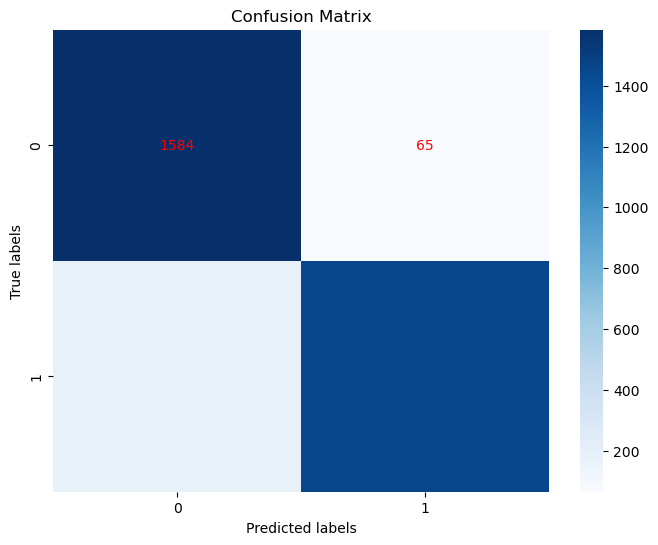

In [53]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Hitung confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix sebagai heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, fmt='d', cmap='Blues', annot=True, annot_kws={"color": "red"})
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


In [54]:
# Evaluasi model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[1584   65]
 [ 179 1458]]

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.96      0.93      1649
           1       0.96      0.89      0.92      1637

    accuracy                           0.93      3286
   macro avg       0.93      0.93      0.93      3286
weighted avg       0.93      0.93      0.93      3286



In [55]:
# Mendapatkan akurasi pada data training dan testing
train_accuracy = best_model.score(X_train, y_train)
test_accuracy = best_model.score(X_test, y_test)

# Tampilkan akurasi
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Testing Accuracy: {test_accuracy:.4f}")

Training Accuracy: 0.9196
Testing Accuracy: 0.9257


## Kurva ROC

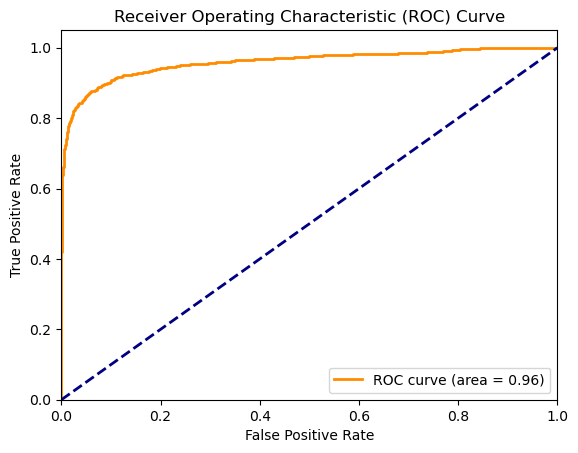

In [56]:
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

y_scores = log_reg.predict_proba(X_test)[:,1]

# Menghitung nilai TPR dan FPR
y_scores = log_reg.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

# Plot kurva ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

## Uji parameter

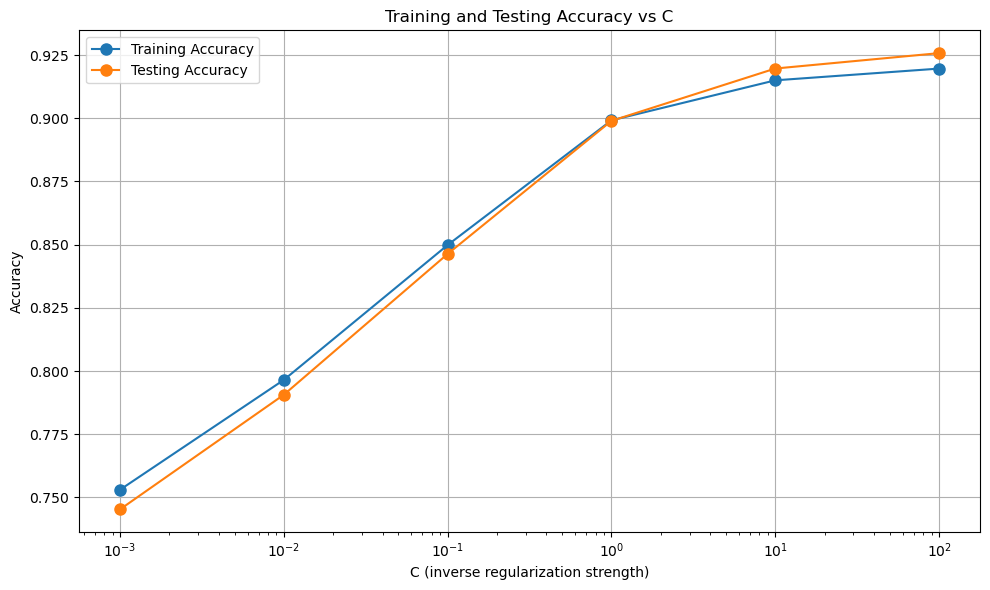

In [57]:
# Mendefinisikan range nilai C yang akan diuji
param_values = [0.001, 0.01, 0.1, 1, 10, 100]

# Menyimpan akurasi pelatihan dan pengujian
train_accuracies = []
test_accuracies = []

# Melakukan grid search untuk setiap nilai C
for c in param_values:
    log_reg = LogisticRegression(C=c, max_iter=1000)
    log_reg.fit(X_train, y_train)
    
    train_accuracy = log_reg.score(X_train, y_train)
    test_accuracy = log_reg.score(X_test, y_test)
    
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

# Plot akurasi pada data training dan testing
plt.figure(figsize=(10, 6))
plt.plot(param_values, train_accuracies, '-o', label='Training Accuracy', markersize=8)
plt.plot(param_values, test_accuracies, '-o', label='Testing Accuracy', markersize=8)
plt.xscale('log')
plt.xlabel('C (inverse regularization strength)')
plt.ylabel('Accuracy')
plt.title('Training and Testing Accuracy vs C')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## Cek Setiap Parameter

In [58]:
# Mendapatkan skor cross-validation
cv_results = grid_search.cv_results_

# Tampilkan skor cross-validation untuk setiap parameter C
for mean_score, params in zip(cv_results['mean_test_score'], cv_results['params']):
    print(f"Mean Accuracy: {mean_score:.4f} with params: {params}")

Mean Accuracy: 0.7516 with params: {'C': 0.001}
Mean Accuracy: 0.7928 with params: {'C': 0.01}
Mean Accuracy: 0.8431 with params: {'C': 0.1}
Mean Accuracy: 0.8962 with params: {'C': 1}
Mean Accuracy: 0.9143 with params: {'C': 10}
Mean Accuracy: 0.9195 with params: {'C': 100}


## Cek Setiap K-Folds (cross validation)

In [59]:
n_splits_values = [3, 5, 7, 10]

results = {}

for n_splits in n_splits_values:
    # Mendefinisikan K-Fold cross-validator
    kfold = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    
    # Membuat objek GridSearchCV
    grid_search = GridSearchCV(estimator=log_reg, param_grid=param_grid, cv=kfold, scoring='accuracy')
    
    # Melatih model dengan hyperparameter tuning menggunakan data latih
    grid_search.fit(X_train, y_train)
    
    # Mendapatkan model terbaik
    best_model = grid_search.best_estimator_
    
    # Lakukan prediksi pada data uji menggunakan model terbaik
    y_pred = best_model.predict(X_test)
    
    # Evaluasi model dengan confusion matrix dan classification report
    conf_matrix = confusion_matrix(y_test, y_pred)
    results[n_splits] = {
        'best_model': best_model,
        'conf_matrix': conf_matrix,
        'accuracy': best_model.score(X_test, y_test)
    }

# Menampilkan hasil evaluasi untuk setiap n_splits
for n_splits, result in results.items():
    print(f"\nEvaluation results for n_splits = {n_splits}:")
    print("Confusion Matrix:")
    print(result['conf_matrix'])
    print("\nTesting Accuracy:", result['accuracy'])
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))


Evaluation results for n_splits = 3:
Confusion Matrix:
[[1584   65]
 [ 179 1458]]

Testing Accuracy: 0.9257455873402313

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.96      0.93      1649
           1       0.96      0.89      0.92      1637

    accuracy                           0.93      3286
   macro avg       0.93      0.93      0.93      3286
weighted avg       0.93      0.93      0.93      3286


Evaluation results for n_splits = 5:
Confusion Matrix:
[[1584   65]
 [ 179 1458]]

Testing Accuracy: 0.9257455873402313

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.96      0.93      1649
           1       0.96      0.89      0.92      1637

    accuracy                           0.93      3286
   macro avg       0.93      0.93      0.93      3286
weighted avg       0.93      0.93      0.93      3286


Evaluation results for n_splits = 7:
Confusion Matrix:


## Validasi Model

In [60]:
# Cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(log_reg, X_train, y_train, cv=kfold, scoring='accuracy')

# Print cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", cv_scores.mean())
print("Standard deviation of cross-validation scores:", cv_scores.std())

Cross-validation scores: [0.91780822 0.91971081 0.92313546 0.91971081 0.91704718]
Mean cross-validation score: 0.9194824961948249
Standard deviation of cross-validation scores: 0.0021062941405019806


In [62]:
!jupyter nbconvert --to html "./00000074859_DWI YULIANTO_SourceCode_UAS_IF540L.ipynb" --output-dir="./"

[NbConvertApp] Converting notebook ./00000074859_DWI YULIANTO_SourceCode_UAS_IF540L.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 20 image(s).
[NbConvertApp] Writing 1401213 bytes to 00000074859_DWI YULIANTO_SourceCode_UAS_IF540L.html
